In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [91]:
data = pd.read_csv('ex2data1.txt', names=['exam1','exam2','admitted'])
data.head()

,exam1,exam2,admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


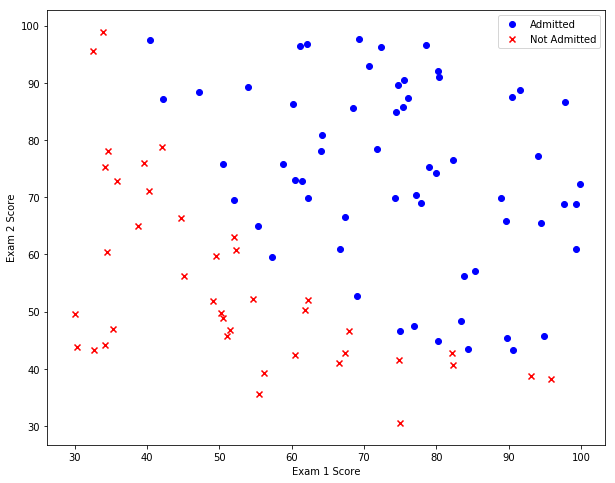

In [92]:
positive = data[data['admitted'] == 1]
negative = data[data['admitted'] == 0]

fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(positive['exam1'], positive['exam2'], c='b', marker='o', label='Admitted')
ax.scatter(negative['exam1'], negative['exam2'], c='r', marker='x', label='Not Admitted')

ax.legend()
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')
plt.show()

In [93]:
# function of sigmoid
def sigmoid(z):
    return 1/(1+np.exp(-z))

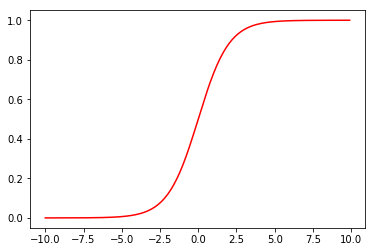

In [94]:
# check sigmoid
x1 = np.arange(-10,10,0.1)
plt.plot(x1,sigmoid(x1),c='r')
plt.show()

In [95]:
#define cost function
def cost(theta, X, y):
    first = (-y)*np.log(sigmoid(X @ theta))
    second = (1-y)*np.log(1-sigmoid(X @ theta))
    
    return np.mean(first-second)

In [96]:
if 'ones' not in data.columns:
    data.insert(0,'ones',1)

X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values
theta = np.zeros(X.shape[1])
theta

array([0., 0., 0.])

In [97]:
cost(theta, X ,y)

0.6931471805599453

In [98]:
#gradient descent
def gradient(theta,X ,y):
    return(X.T @ (sigmoid(X @ theta) - y))/len(X)

In [99]:
gradient(theta, X ,y)

array([ -0.1       , -12.00921659, -11.26284221])

In [100]:
import scipy.optimize as opt

result = opt.fmin_tnc(func=cost, x0=theta, fprime = gradient, args=(X,y))
result

(array([-25.16131854,   0.20623159,   0.20147149]), 36, 0)

In [101]:
cost(result[0],X,y)

0.20349770158947492

In [102]:
def predict(theta, X):
    predictions = sigmoid(X @ theta)
    return [1 if x >= 0.5 else 0 for x in predictions]

In [103]:

# 计算预测精度
final_theta = result[0]
predictions = predict(final_theta, X)
correct = [1 if a==b else 0 for (a, b) in zip(predictions, y)]
accuracy = sum(correct) / len(X)
accuracy

0.89

In [104]:
x1 = np.arange(130, step=0.1)
x2 = -(final_theta[0] + x1*final_theta[1]) / final_theta[2]

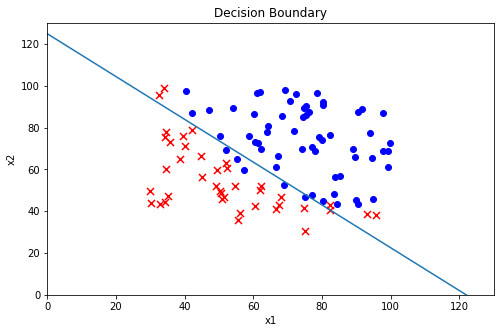

In [105]:

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(positive['exam1'], positive['exam2'], c='b', label='Admitted')
ax.scatter(negative['exam1'], negative['exam2'], s=50, c='r', marker='x', label='Not Admitted')
ax.plot(x1, x2)
ax.set_xlim(0, 130)
ax.set_ylim(0, 130)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_title('Decision Boundary')
plt.show()

In [106]:
data2 = pd.read_csv('ex2data2.txt', names=['Test 1', 'Test 2', 'Accepted'])
data2.head()

,Test 1,Test 2,Accepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


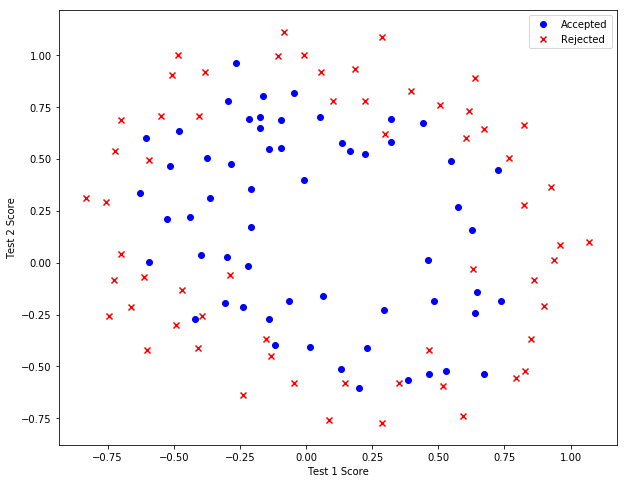

In [107]:
positive = data2[data2['Accepted'] == 1]
negative = data2[data2['Accepted'] == 0]

fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(positive['Test 1'], positive['Test 2'], c='b', marker='o', label='Accepted')
ax.scatter(negative['Test 1'], negative['Test 2'], c='r', marker='x', label='Rejected')

ax.legend()
ax.set_xlabel('Test 1 Score')
ax.set_ylabel('Test 2 Score')
plt.show()

In [108]:
def feature_mapping(x1, x2, power):
    data = {}
    for i in np.arange(power + 1):
        for p in np.arange(i + 1):
            data["f{}{}".format(i - p, p)] = np.power(x1, i - p) * np.power(x2, p)

    return pd.DataFrame(data)

In [109]:
x1 = data2['Test 1'].values
x2 = data2['Test 2'].values

In [110]:
features = feature_mapping(x1, x2, 6)
features.head()

,f00,f10,f01,f20,f11,f02,f30,f21,f12,f03,...,f23,f14,f05,f60,f51,f42,f33,f24,f15,f06
0,1.0,0.051267,0.69956,0.002628,0.035864,0.489384,0.000135,0.001839,0.025089,0.342354,...,0.000900,0.012278,0.167542,1.815630e-08,2.477505e-07,0.000003,0.000046,0.000629,0.008589,0.117206
1,1.0,-0.092742,0.68494,0.008601,-0.063523,0.469143,-0.000798,0.005891,-0.043509,0.321335,...,0.002764,-0.020412,0.150752,6.362953e-07,-4.699318e-06,0.000035,-0.000256,0.001893,-0.013981,0.103256
2,1.0,-0.213710,0.69225,0.045672,-0.147941,0.479210,-0.009761,0.031616,-0.102412,0.331733,...,0.015151,-0.049077,0.158970,9.526844e-05,-3.085938e-04,0.001000,-0.003238,0.010488,-0.033973,0.110047
3,1.0,-0.375000,0.50219,0.140625,-0.188321,0.252195,-0.052734,0.070620,-0.094573,0.126650,...,0.017810,-0.023851,0.031940,2.780914e-03,-3.724126e-03,0.004987,-0.006679,0.008944,-0.011978,0.016040
4,1.0,-0.513250,0.46564,0.263426,-0.238990,0.216821,-0.135203,0.122661,-0.111283,0.100960,...,0.026596,-0.024128,0.021890,1.827990e-02,-1.658422e-02,0.015046,-0.013650,0.012384,-0.011235,0.010193


In [111]:
X = features
y = data2['Accepted'].values

theta = np.zeros(X.shape[1])
X.shape, y.shape, theta.shape

((118, 28), (118,), (28,))

In [112]:
def cost_reg(theta, X, y, l=1):
    # from theta1 to n
    _theta = theta[1: ]
    reg = (l / (2 * len(X))) *(_theta @ _theta)  # _theta@_theta == inner product
    
    return cost(theta, X, y) + reg

In [113]:
cost_reg(theta, X, y, l=1)

0.6931471805599461

In [114]:
def gradient_reg(theta, X, y, l=1):
    reg = (1 / len(X)) * theta
    reg[0] = 0  
    return gradient(theta, X, y) + reg
gradient_reg(theta, X, y, 1)


f00    0.008475
f10    0.018788
f01    0.000078
f20    0.050345
f11    0.011501
f02    0.037665
f30    0.018356
f21    0.007324
f12    0.008192
f03    0.023476
f40    0.039349
f31    0.002239
f22    0.012860
f13    0.003096
f04    0.039303
f50    0.019971
f41    0.004330
f32    0.003386
f23    0.005838
f14    0.004476
f05    0.031008
f60    0.031031
f51    0.001097
f42    0.006316
f33    0.000409
f24    0.007265
f15    0.001376
f06    0.038794
dtype: float64

In [115]:
result2 = opt.fmin_tnc(func=cost_reg, x0=theta, fprime=gradient_reg, args=(X, y, 2))
result2

(array([ 1.02252845,  0.56283947,  1.13465378, -1.78530023, -0.66539149,
        -1.01863396,  0.13957   , -0.29358944, -0.30102267, -0.08324513,
        -1.27206004, -0.06137383, -0.53996526, -0.17881809, -0.9419886 ,
        -0.14054855, -0.17736663, -0.0769737 , -0.22918951, -0.21349652,
        -0.37205413, -0.86417673,  0.00890083, -0.26795962, -0.00362248,
        -0.28315235, -0.07321588, -0.75992674]), 57, 4)

In [116]:
from sklearn import linear_model#调用sklearn的线性回归包
model = linear_model.LogisticRegression(penalty='l2', C=1.0, solver='liblinear')
model.fit(X, y.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [117]:
model.score(X, y)


0.8305084745762712

In [118]:
final_theta = result2[0]
predictions = predict(final_theta, X)
correct = [1 if a==b else 0 for (a, b) in zip(predictions, y)]
accuracy = sum(correct) / len(correct)
accuracy

0.8050847457627118

In [119]:
from sklearn.metrics import classification_report

print(classification_report(y, predictions))

              precision    recall  f1-score   support

           0       0.85      0.75      0.80        60
           1       0.77      0.86      0.81        58

   micro avg       0.81      0.81      0.81       118
   macro avg       0.81      0.81      0.80       118
weighted avg       0.81      0.81      0.80       118



In [131]:
x = np.linspace(-1, 1.5, 250)
xx, yy = np.meshgrid(x, x)

(-0.8, 1.2)

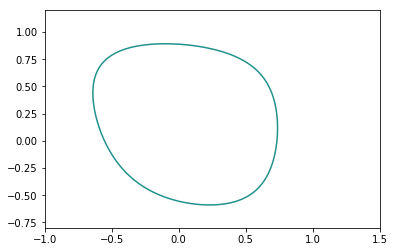

In [132]:

z = feature_mapping(xx.ravel(), yy.ravel(), 6).values
z = z @ final_theta
z = z.reshape(xx.shape)
plt.contour(xx, yy, z, 0)
plt.ylim(-.8, 1.2)